In [1]:
import cv2

input = cv2.imread('/content/samplemri.png')
input = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY) #Black and White

**Preprocessing**
1. Gamma Correction
2. Sharpening
3. Their Combination


Text(0.5, 1.0, 'Sharpened + Gamma')

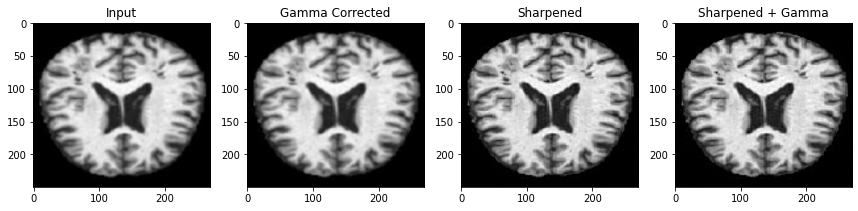

In [2]:
'''Gamma Correction'''

import numpy as np

gamma = np.array(255*(input / 255) ** 1, dtype = 'uint8')

'''Sharpening'''

kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]]) #Sharpening Kernal
sharp = cv2.filter2D(input, -1, kernel)

'''Sharpen + Gamma Correction'''

sharp_gamma = cv2.filter2D(gamma, -2, kernel)

# Visual Depiction

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15.00, 7.0]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 5, 1)
plt.imshow(input, cmap="gray")
plt.title('Input')
plt.subplot(1, 5, 2)
plt.imshow(gamma, cmap='gray')
plt.title('Gamma Corrected')
plt.subplot(1, 5, 3)
plt.imshow(sharp, cmap='gray')
plt.title('Sharpened')
plt.subplot(1, 5, 4)
plt.imshow(sharp_gamma, cmap='gray')
plt.title('Sharpened + Gamma')

**Augmentation 1: Rotations**

Step 1. Rotate 0-100 degrees in intervals of 5 (both + and -) -> 40 Images

Total Images for this augmentation -> 40

Total Images for all augmentations -> 40

**Augmentation 2: Translation + Rotations**

Step 1. Translate Image
Step 2. Follow Step 1 of Augmentation 1. + 40
Step 3. Translate Image in another way
Step 4. Follow Step 1 of Augmentation 1. + 40

Total Images for this augmentation -> 40 + 40 -> 80

Total Images for all augmentations -> 80 + 40 -> 120

**Augmentation 3: Noise**

Step 1. Add noise to All Augmented Images till Current step -> 120

Total Images for this augmentation -> 120

Total Images for all augmentations -> 80 + 40 + 120 -> 240

**Augmentation 4: Shearing**

Step 1. Shear images in 20 different ways.

Total Images for this augmentation -> 20

Total Images for all augmentations -> 80 + 40 + 120 + 20 -> 260

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


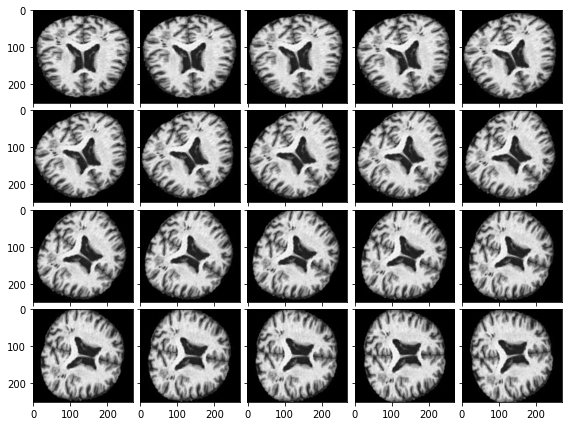

In [3]:
'''Augmentation 1: Rotations'''

import imutils

pve_rotations = [] # Defining List to pl0t and store images
nve_rotations = [] 

for degree in range (0, 100, 5): # 0 to 100 Degrees with 5 Interval so as to make the rotation more constructive

  pve = imutils.rotate(sharp_gamma, degree) # positive rotations
  pve_rotations.append(pve)
  nve = imutils.rotate(sharp_gamma, -degree) #negative rotations
  nve_rotations.append(nve)

# Visual Depiction

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 5), # define grid
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, pve_rotations):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')

plt.show()

Text(0.5, 1.0, 'Translated')

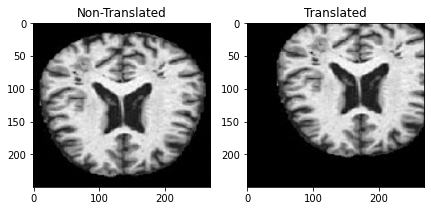

In [4]:
'''Translation'''

# shift the image 35 pixels to the right and -30 pixels down
M = np.float32([[1, 0, 35], [0, 1, -30]])

trans = cv2.warpAffine(sharp_gamma, M, (sharp_gamma.shape[1], sharp_gamma.shape[0]))

# Visual Depiction

plt.rcParams["figure.figsize"] = [15.00, 7.0]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 5, 1)
plt.imshow(sharp_gamma, cmap="gray")
plt.title('Non-Translated')
plt.subplot(1, 5, 2)
plt.imshow(trans, cmap='gray')
plt.title('Translated')

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


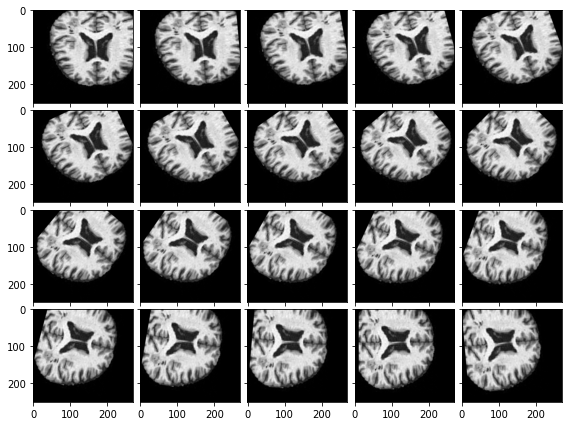

In [5]:
'''Augmentation 2: Translation + Roatation'''

trans_pve_rotations = [] # Defining List to pl0t and store images
trans_nve_rotations = [] 

for degree in range (0, 100, 5): # 0 to 100 Degrees with 5 Interval so as to make the rotation more constructive

  trans_pve = imutils.rotate(trans, degree) # positive rotations
  trans_pve_rotations.append(trans_pve)
  trans_nve = imutils.rotate(sharp_gamma, -degree) #negative rotations
  trans_nve_rotations.append(trans_nve)

# output
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 5), # define grid
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, trans_pve_rotations):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')

plt.show()

Text(0.5, 1.0, 'Noise')

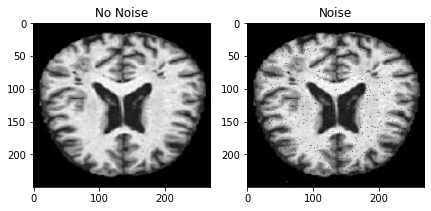

In [6]:
'''Augmentation 3: Noise'''

import random

def add_noise(img):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(1, 10)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255
		
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(900 , 1000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img # salt-and-pepper noise can be applied only to grayscale images

# Visualizing result

plt.rcParams["figure.figsize"] = [15.00, 7.0]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 5, 1)
plt.imshow(sharp_gamma, cmap="gray")
plt.title('No Noise')
plt.subplot(1, 5, 2)
plt.imshow(add_noise(sharp_gamma), cmap='gray')
plt.title('Noise')

Text(0.5, 1.0, 'Sheared')

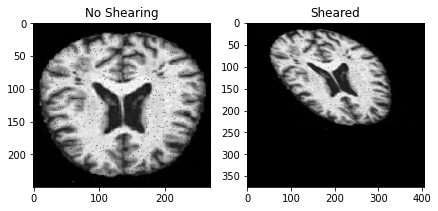

In [7]:
'''Augmentation 4: Shearing'''

# get the image shape
rows, cols = sharp_gamma.shape

# transformation matrix for Shearing

# shearing applied to x-axis
M = np.float32([[1, 0.5, 0],
             	[0, 1  , 0],
            	[0, 0  , 1]])

# shearing applied to y-axis
# M = np.float32([[1,   0, 0],
#             	  [0.5, 1, 0],
#             	  [0,   0, 1]])

# apply a perspective transformation to the image                
sheared_img = cv2.warpPerspective(sharp_gamma,M,(int(cols*1.5),int(rows*1.5)))

# Visualizing result

plt.rcParams["figure.figsize"] = [15.00, 7.0]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 5, 1)
plt.imshow(sharp_gamma, cmap="gray")
plt.title('No Shearing')
plt.subplot(1, 5, 2)
plt.imshow(sheared_img, cmap='gray')
plt.title('Sheared')

In [8]:
cv2.imwrite('torch_input.jpg', sharp_gamma)

# shear = []

# for s in range (1,10):
#   # shearing applied to x-axis
#   M = np.float32([[1, 0.5, 0],
#              	[0, s  , 0],
#             	[0, 0  , 1]])
#   sheared_img = cv2.warpPerspective(sharp_gamma,M,(int(cols*1.5),int(rows*1.5)))
#   shear.append(sheared_img)

# # output
# from mpl_toolkits.axes_grid1 import ImageGrid

# fig = plt.figure(figsize=(8., 8.))
# grid = ImageGrid(fig, 111,  # similar to subplot(111)
#                  nrows_ncols=(2, 5), # define grid
#                  axes_pad=0.1,  # pad between axes in inch.
#                  )

# for ax, im in zip(grid, shear):
#     # Iterating over the grid returns the Axes.
#     ax.imshow(im)

# plt.show()

True

## Upload Image and use Pytorch for Shearing

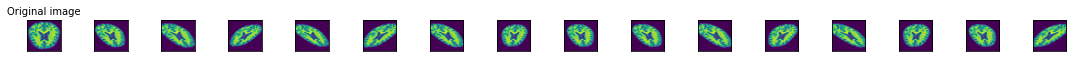

In [9]:
from PIL import Image

input_img = Image.open('torch_input.jpg') #Reading image and converting into black and white

import torch
import torchvision.transforms as T

affine_transfomer = T.RandomAffine(degrees=(0), scale=(0.8, 0.9), shear=(50))
affine_imgs = [affine_transfomer(input_img) for _ in range(15)]

torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [input_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(10)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

plot(affine_imgs)